<a href="https://colab.research.google.com/github/yveyct/Social-Media-and-Web-Analytics/blob/main/social_media_and_web_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data.


In [1]:
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
from textblob import TextBlob
from wordcloud import WordCloud
from string import digits
import requests
import pandas as pd
import nltk
import string
import seaborn as sns
import re
nltk.download("stopwords")
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []


for i in range(1, pages + 1):

    print(f"Scraping page {i}")


    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"


    response = requests.get(url)


    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Absolutely horrible custome...
1,Not Verified | BA is not what it used to be! ...
2,"✅ Trip Verified | BA First, it's not even the..."
3,✅ Trip Verified | The worst business class ex...
4,Not Verified | Quite possibly the worst busin...


In [4]:

df.to_csv("BA_reviews3.csv")

Data cleaning

In [5]:
import nltk

from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer


In [6]:
import pandas as pd

csv_path = "BA_reviews3.csv"
df1 = pd.read_csv(csv_path)
df1.reset_index(drop=True, inplace=True)

print(df1['reviews'])

0      ✅ Trip Verified |  Absolutely horrible custome...
1      Not Verified |  BA is not what it used to be! ...
2      ✅ Trip Verified |  BA First, it's not even the...
3      ✅ Trip Verified |  The worst business class ex...
4      Not Verified |  Quite possibly the worst busin...
                             ...                        
995    ✅ Trip Verified |  I had a miserable experienc...
996    ✅ Trip Verified |  Leeds Bradford to Las Vegas...
997    ✅ Trip Verified |  Dallas to London Heathrow i...
998    ✅ Trip Verified |  Tenerife to Heathrow. Effec...
999    ✅ Trip Verified | Heathrow to Larnaca - depart...
Name: reviews, Length: 1000, dtype: object


In [7]:
df1.info()
df1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   reviews     1000 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


,Unnamed: 0
count,1000.000000
mean,499.500000
std,288.819436
min,0.000000
25%,249.750000
50%,499.500000
75%,749.250000
max,999.000000


In [8]:
df1['reviews'] = df1['reviews'].str.strip()
df1['reviews']=df1['reviews'].str.lstrip('✅Trip Verified |')
df1['reviews']=df1['reviews'].str.lstrip('Not Verified |')
df1['reviews']= df1['reviews'].str.lower()
print(df1)

     Unnamed: 0                                            reviews
0             0    absolutely horrible customer service - will ...
1             1  ba is not what it used to be! as much as i lik...
2             2    ba first, it's not even the best business cl...
3             3  he worst business class experience. ground cre...
4             4  quite possibly the worst business class i have...
..          ...                                                ...
995         995  i had a miserable experience in first class fr...
996         996  leeds bradford to las vegas via heathrow. cust...
997         997  dallas to london heathrow in first class. this...
998         998  nerife to heathrow. effectively a budget airli...
999         999  heathrow to larnaca - departed on time, flight...

[1000 rows x 2 columns]


Sentiment analysis of reviews using nltk

In [9]:
#remove punctuation
df1['reviews'] = df1['reviews'].str.replace('[^\w\s]','')
print(df1['reviews'])

0        absolutely horrible customer service  will n...
1      ba is not what it used to be as much as i like...
2        ba first its not even the best business clas...
3      he worst business class experience ground crew...
4      quite possibly the worst business class i have...
                             ...                        
995    i had a miserable experience in first class fr...
996    leeds bradford to las vegas via heathrow custo...
997    dallas to london heathrow in first class this ...
998    nerife to heathrow effectively a budget airlin...
999    heathrow to larnaca  departed on time flight n...
Name: reviews, Length: 1000, dtype: object


<ipython-input-9-05b35ac04ac2>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['reviews'] = df1['reviews'].str.replace('[^\w\s]','')


In [10]:

print(df1.iloc[1,1])


ba is not what it used to be as much as i like their onboard crew their check in staff lacked interest in their job and safety at no point did he make eye contact or ask security questions and counters opened 7 minutes late crew from cph was wonderful but announcements were too loud and too many  maybe i was just grumpy took less than 15 to get out of lhr through self service and transfer to lgw was a breeze crew on the pos sector was ok had an aisle seat and was bumped into by a cabin crew booty continuously for 9 hours not her fault but could never relax fully one caribbean crew excelled and joined the carnival spirit most passengers were feeling onboard i wonder if ba management ever tasted the food onboard absolutely tasteless and some of the worst i saved 550 choosing ba over klm which was the only reason i chose them klm is definitely a league over ba in many aspects and no need to change airports


In [11]:
# df1['reviews'] = df1['reviews'].apply(lambda x: ' '.join([word for word in x if word not in (stop_words)]))
print(df1.head(20))

    Unnamed: 0                                            reviews
0            0    absolutely horrible customer service  will n...
1            1  ba is not what it used to be as much as i like...
2            2    ba first its not even the best business clas...
3            3  he worst business class experience ground crew...
4            4  quite possibly the worst business class i have...
5            5  i will never be flying with ba again this is m...
6            6  on the my trip to mexico city i had the opport...
7            7    i upgraded at check in to club europe seat 1...
8            8  i bought a return trip with ba through webjet ...
9            9  poor from start to finish six months after pur...
10          10  communication and customer service non existen...
11          11  hat was supposed to be my flight but it was ca...
12          12  have no fear when your ba flight is operated b...
13          13  we have flown ba five times from western usa t...
14        

In [12]:
def polarity_calc(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None



def tag_cal(num):
    if num<0:
        return 'Negative'
    elif num>0:
        return 'Positive'
    else:
        return 'Neutral'


df1['polarity'] = df1['reviews'].apply(polarity_calc)


df1['tag'] = df1['polarity'].apply(tag_cal)


print(df1)

     Unnamed: 0                                            reviews  polarity  \
0             0    absolutely horrible customer service  will n... -0.175000   
1             1  ba is not what it used to be as much as i like...  0.094872   
2             2    ba first its not even the best business clas...  0.012000   
3             3  he worst business class experience ground crew... -0.019097   
4             4  quite possibly the worst business class i have... -0.021667   
..          ...                                                ...       ...   
995         995  i had a miserable experience in first class fr... -0.135204   
996         996  leeds bradford to las vegas via heathrow custo...  0.031250   
997         997  dallas to london heathrow in first class this ...  0.009556   
998         998  nerife to heathrow effectively a budget airlin...  0.077273   
999         999  heathrow to larnaca  departed on time flight n...  0.033007   

          tag  
0    Negative  
1    Po

Analyze

In [13]:
(df1.groupby('tag').size()/df1['tag'].count())*100

tag
Negative    35.4
Neutral      1.0
Positive    63.6
dtype: float64

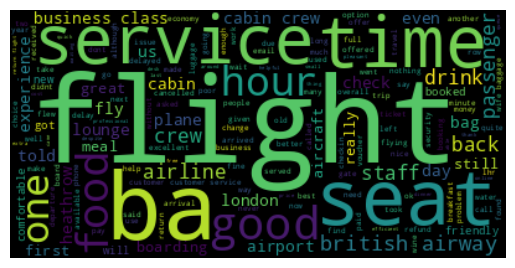

In [14]:
# positive
text = " "
for ind in df1.index:
    if df1['tag'][ind] == "Positive":
        text = text + df1['reviews'][ind]

wordcloud_positive = WordCloud().generate(text)



plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.show()

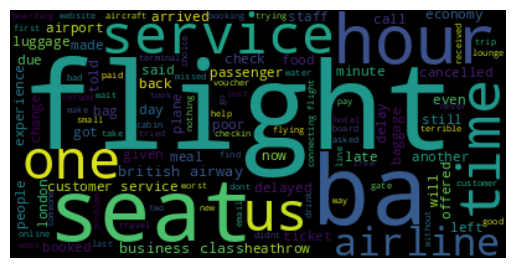

In [15]:
#negative
text2= " "
for ind in df1.index:
    if df1['tag'][ind] == "Negative":
        text2 = text2 + df1['reviews'][ind]
wordcloud_negative = WordCloud().generate(text2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.show()

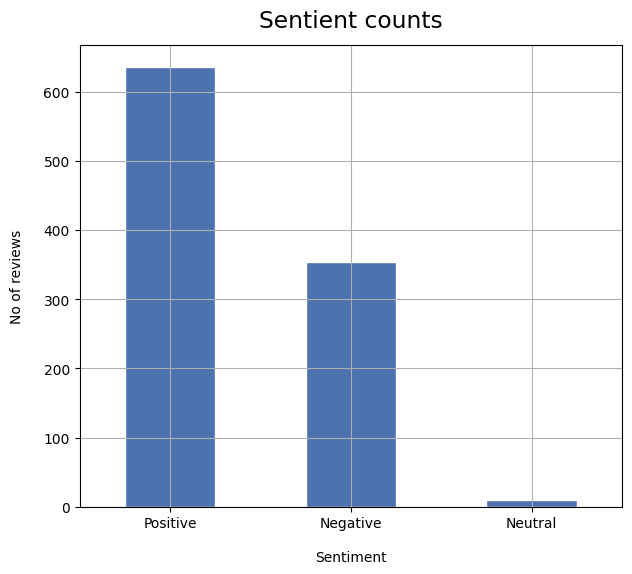

In [16]:
df1['tag'].value_counts().plot(kind='bar')
sns.set(font_scale=1.4)
df1['tag'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Sentiment", labelpad=14)
plt.ylabel("No of reviews", labelpad=14)
plt.title("Sentient counts", y=1.02);

In [58]:
reviews_list = df1['reviews'].tolist()

In [44]:
from nltk.probability import FreqDist
import pandas as pd
from sklearn.feature_extraction import text


words = " ".join(reviews).split(" ")


additional_stopwords = ['flight', 'ba', "passenger", "u", "london", "airway", "british", "airline",
                        "heathrow", "plane", "lhr", "review", "ba12", "b747436", "1998","I", "The","BA","Verified","|", "Trip","✅" ,"-"," ","We","just","London","British","did","told","They","Heathrow","Airways","/"]
stopwords = text.ENGLISH_STOP_WORDS.union(additional_stopwords)

unwanted_word = '        '
new_words = [word for word in words if word not in stopwords and word != unwanted_word and word.strip() != '']

nlp_words = FreqDist(new_words).most_common(15)

all_fdist = pd.Series(dict(nlp_words)).to_frame().reset_index()
all_fdist.columns = ['Word', 'Frequency']

print(all_fdist)


        Word  Frequency
0    service        503
1       crew        364
2       time        348
3       seat        343
4      staff        318
5       food        318
6   business        303
7        Not        290
8      cabin        288
9       good        288
10   flight.        282
11     seats        280
12     class        276
13     hours        276
14  customer        230


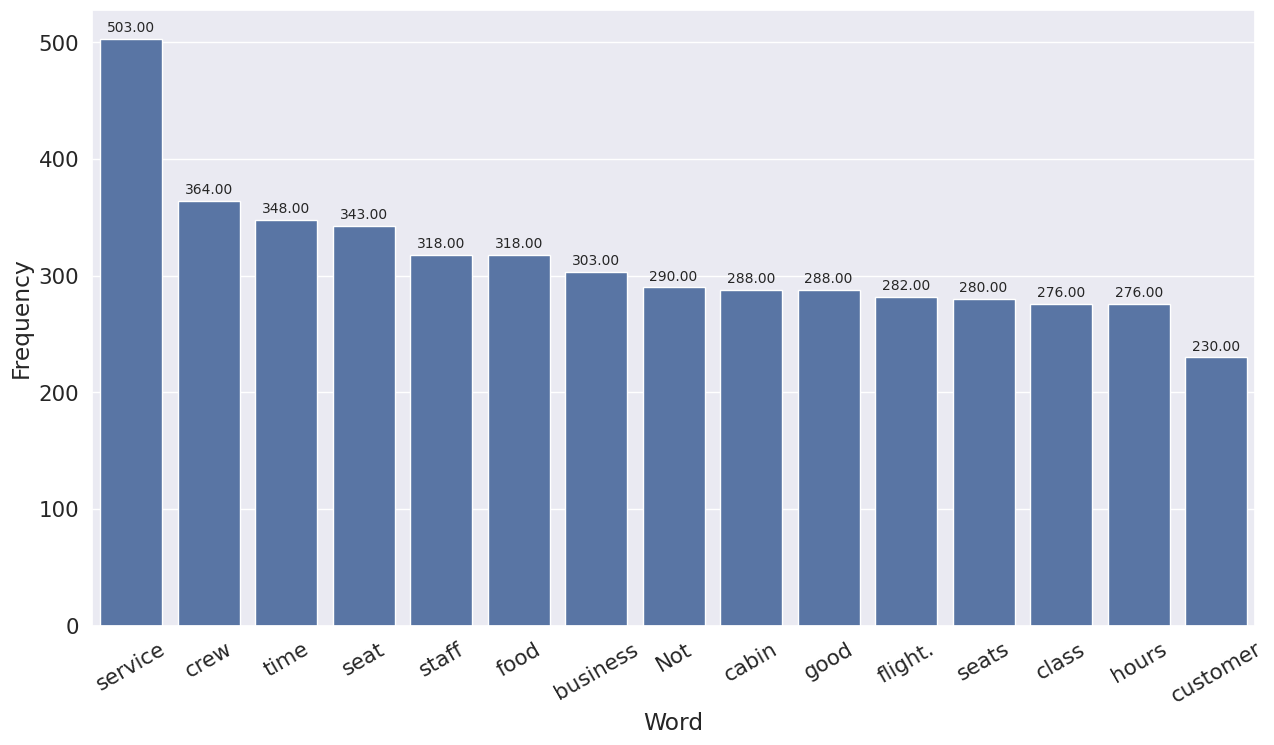

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(15, 8))


all_plot = sns.barplot(x='Word', y='Frequency', data=all_fdist, ax=ax)

for bar in all_plot.patches:
    all_plot.annotate(format(bar.get_height(), '.2f'),
                      (bar.get_x() + bar.get_width() / 2.,
                       bar.get_height()), ha = 'center', va = 'center',
                       size=10, xytext = (0, 8),
                       textcoords = 'offset points')

plt.xticks(rotation=30)
plt.show()


In [59]:

import nltk.collocations as collocations
from nltk import FreqDist, bigrams
reviews_list = df1['reviews'].tolist()

all_words1 = []

for review in reviews_list:
    words = review.split()
    all_words1.extend(words)



stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","/", "london","airway","british","airline","felt","like"])

all_words11 = [all_words1 for all_words1 in words if all_words1 not in stopwords]


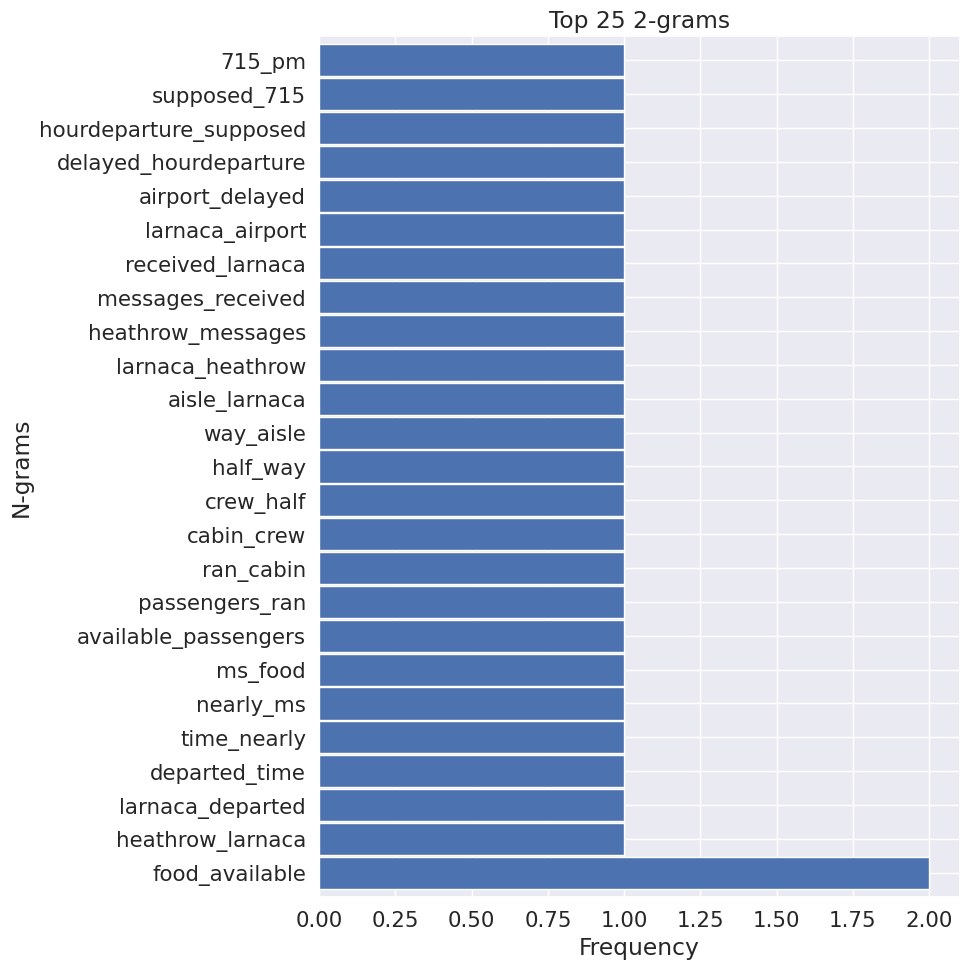

<Axes: title={'center': 'Top 25 2-grams'}, xlabel='Frequency', ylabel='N-grams'>

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk import ngrams
from nltk.probability import FreqDist

def get_freq_dist(all_words, number_of_ngrams):

    generated_ngrams = ngrams(all_words, number_of_ngrams)


    ngram_fd = FreqDist(generated_ngrams).most_common(25)


    ngram_sorted = {('_'.join(k)): v for k, v in ngram_fd}

    ngram_freqdist = pd.Series(ngram_sorted)

    plt.figure(figsize=(10, 10))
    ax = ngram_freqdist.plot(kind="barh", width=0.95)
    ax.set_xlabel('Frequency')
    ax.set_ylabel('N-grams')
    ax.set_title(f'Top 25 {number_of_ngrams}-grams')
    plt.tight_layout()
    plt.show()

    return ax


get_freq_dist(all_words11, 2)
